In [ ]:
!pip install cvlib
!pip install diffusers==0.6.0
!pip install easyocr
!pip install transformers==4.23.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 68.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046383 sha256=07ee866cc520db7a068763d5fbe532427324c0d4a498be279e854052fc472164
  Stored in directory: /root/.cache/pip/wheels/bb/11/55/82ced947752cc4056335a4ee9c304a93d43ce857230538f0ae
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12081 sha256=f7dc0d2745a0e2d8ad5a12ac5c55db609605dc7188d1e61cd232cb4b74f4f1ad
  Stored in directory: /root/.cache/pip/wheels/2c/67/ed/d84123843c937d7e7f5ba88a270d11036473144143355e2747
Successfully built cvlib progressbar
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.4/255.4 KB 6.2 MB/s eta 0:00:0

In [ ]:
import os
import cv2
import easyocr
import math
import numpy as np
import cvlib as cv
from diffusers import DiffusionPipeline
from torchvision import transforms
import torch
from google.colab.patches import cv2_imshow
from PIL import Image
# from skimage import io
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = DiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    revision="fp16",
    torch_dtype=torch.float16,
    use_auth_token=False,
).to(device)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [ ]:
# test_img = Image.fromarray(cv2.imread("./init_image.png"))
# test_mask = Image.fromarray(cv2.imread("./mask_image.png"))
# output = pipe(prompt = "", image=test_img, mask_image=test_mask, strength=0.8)
# output_img = np.array(output.images[0].getdata()).reshape(output.images[0].size[0], output.images[0].size[1], 3)
# cv2_imshow(output_img)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive' , force_remount=True)

In [ ]:
%cd '/content/drive/MyDrive/precog_3d'
!ls

[Errno 2] No such file or directory: '/content/drive/MyDrive/precog_3d'
/content
ab.jpg	sample_data


In [ ]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

def FindPoint(rect, pt):
    x1, y1, x2, y2 = rect
    x, y = pt
    if (x > x1 and x < x2 and y > y1 and y < y2) :
        return True
    else:
        return False


def scale_rectangle(rect, scale_factor):
    x1, y1, x2, y2, x3, y3, x4, y4 = rect
    cx, cy = (x1 + x3) / 2, (y1 + y3) / 2
    x1, y1 = (x1 - cx) * scale_factor + cx, (y1 - cy) * scale_factor + cy
    x2, y2 = (x2 - cx) * scale_factor + cx, (y2 - cy) * scale_factor + cy
    x3, y3 = (x3 - cx) * scale_factor + cx, (y3 - cy) * scale_factor + cy
    x4, y4 = (x4 - cx) * scale_factor + cx, (y4 - cy) * scale_factor + cy
    return x1, y1, x2, y2, x3, y3, x4, y4

In [ ]:
def preProcess(img, img_path , results=None):
  rect, label, count = cv.detect_common_objects(img , model="yolov4" , enable_gpu=True)

  print(img.shape)

  inpainted_img = np.copy(img)
  obj = False
  mask = np.zeros(img.shape[:2],np.uint8)
  bgdModel = np.zeros((1,65),np.float64)
  fgdModel = np.zeros((1,65),np.float64)

  if len(rect)!=0:
    obj = True
    print("Object" , label , count)
    # if len(l)!=0:


    #     #
    #     for box in l:
    #       x0, y0 = box[0]
    #       x1, y1 = box[1]
    #       x2, y2 = box[2]
    #       x3, y3 = box[3]

          # cv2.circle(inpainted_img , (x0,y0) , 3 , (0,0,255) , 4)
          # cv2.circle(inpainted_img , (x1,y1) , 3 , (0,0,255) , 4)
          # cv2.circle(inpainted_img , (x2,y2) , 3 , (0,0,255) , 4)
          # cv2.circle(inpainted_img , (x3,y3) , 3 , (0,0,255) , 4)


    # cv2.rectangle(inpainted_img , (rect[0][0] , rect[0][1]) , (rect[0][2] , rect[0][3]) , (255,0,0) , 3)
  # else:
  #   for box in p_gps:
  #     x0, y0 = box[0]
  #     x1, y1 = box[1]
  #     x2, y2 = box[2]
  #     x3, y3 = box[3]

  #     x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
  #     x_mid1, y_mid1 = midpoint(x0, y0, x3, y3)
  #     thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
  #     cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mid1), 255, thickness)

    # inpainted_img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

    # for box in p_gps:
    #   x0, y0 = box[0]
    #   x1, y1 = box[1]
    #   x2, y2 = box[2]
    #   x3, y3 = box[3]

      # cv2.circle(inpainted_img , (int(x0),int(y0)) , 3 , (0,0,255) , 4)
      # cv2.circle(inpainted_img , (int(x1),int(y1)) , 3 , (0,0,255) , 4)
      # cv2.circle(inpainted_img , (int(x2),int(y2)) , 3 , (0,0,255) , 4)
      # cv2.circle(inpainted_img , (int(x3),int(y3)) , 3 , (0,0,255) , 4)


  if len(rect) == 0:
    rect = (10,10,img.shape[1]-10,img.shape[0]-10)
    cv2.rectangle(img , (rect[0] , rect[1]) , (rect[2] , rect[3]) , (255,0,0) , 3)
    cv2_imshow(img)
    cv2.grabCut(img,mask,(rect[0] , rect[1] , rect[2]-rect[0] , rect[3]-rect[1]),bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    cv2_imshow(inpainted_img*mask2[:,:,np.newaxis])
    # inpainted_img = inpainted_img*mask2[:,:,np.newaxis]
  else:
    rect = (rect[0][0],rect[0][1],rect[0][2],rect[0][3])
    cv2.rectangle(img , (rect[0] , rect[1]) , (rect[2] , rect[3]) , (255,0,0) , 3)
    cv2_imshow(img)
    cv2.grabCut(img,mask,(rect[0] , rect[1] , rect[2]-rect[0] , rect[3]-rect[1]),bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    cv2_imshow(inpainted_img*mask2[:,:,np.newaxis])
    # inpainted_img = inpainted_img*mask2[:,:,np.newaxis]

  l=[]
  p_gps=[]
  for i in results:
    if len(i[1]) > 1:
      p_gps.append(i[0])

  # test_img = np.copy(img)
  for i in range(len(p_gps)):
    rectangle = p_gps[i]
    x1,y1 = rectangle[0]
    x2,y2 = rectangle[1]
    x3,y3 = rectangle[2]
    x4,y4 = rectangle[3]

    x1_new , y1_new , x2_new , y2_new , x3_new , y3_new , x4_new , y4_new = scale_rectangle((x1,y1,x2,y2,x3,y3,x4,y4) , 0.8)

    # cv2.circle(test_img , (int(x1_new),int(y1_new)) , 3 , (0,0,255) , 4)
    # cv2.circle(test_img , (int(x2_new),int(y2_new)) , 3 , (0,0,255) , 4)
    # cv2.circle(test_img , (int(x3_new),int(y3_new)) , 3 , (0,0,255) , 4)
    # cv2.circle(test_img , (int(x4_new),int(y4_new)) , 3 , (0,0,255) , 4)
    p_gps[i] = [[x1_new,y1_new],[x2_new,y2_new],[x3_new,y3_new],[x4_new,y4_new]]

  # cv2_imshow(test_img)

  for i in p_gps:
    for j in range(4):

      if not obj:
        claim = FindPoint(rect, i[j])
        claim = bool(claim & mask2[int(i[j][1])][int(i[j][0])])
      else:
        claim = bool(mask2[int(i[j][1])][int(i[j][0])])

      if not claim:
        if i not in l:
          l.append(i)
        break

  init_image = Image.fromarray(img)
  copy_img = np.copy(img)
  # init_image_np = np.array(init_image.getdata()).reshape(init_image.size[0], init_image.size[1], 3)
  inpaint_mask = np.zeros(img.shape[:3], dtype="uint8")

  # cv2_imshow(init_image_np)

  print(l)
  for box in l:
      x0, y0 = box[0]
      x1, y1 = box[1]
      x2, y2 = box[2]
      x3, y3 = box[3]

      x0_new , y0_new , x1_new , y1_new , x2_new , y2_new , x3_new , y3_new = scale_rectangle((x0,y0,x1,y1,x2,y2,x3,y3) , 1.5)
      print(x0_new , y0_new , x2_new , y2_new)
      # x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
      # x_mid1, y_mid1 = midpoint(x0, y0, x3, y3)
      # thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))


      cv2.rectangle(inpaint_mask , (int(x0_new),int(y0_new)) , (int(x2_new),int(y2_new)) , (1,1,1) , -1)
      cv2.rectangle(copy_img , (int(x0_new),int(y0_new)) , (int(x2_new),int(y2_new)) , (255,255,255) , -1)
      # cv2.line(inpaint_mask, (x_mid0, y_mid0), (x_mid1, y_mid1), 255, thickness)



  inpaint_mask = Image.fromarray(inpaint_mask)

  # cv2_imshow(np.array(inpaint_mask.getdata()).reshape(inpaint_mask.size[0], inpaint_mask.size[1], 3))
  cv2_imshow(copy_img)

  output = pipe(prompt = "", image=init_image, mask_image=inpaint_mask, strength=0.8)
  output_img = np.array(output.images[0].getdata()).reshape(output.images[0].size[0], output.images[0].size[1], 3)
  # cv2_imshow(inpaint_mask)
  # inpainted_img = cv2.inpaint(inpainted_img, inpaint_mask, 7, cv2.INPAINT_NS)


  return output_img
  # cv2_imshow(inpainted_img)
  # cv2.imwrite(f'Updated_{img_path[32:]}', inpainted_img)

In [ ]:
# path = "./Fashion"
# path_new = "./Fashion_Updated"
# try:
#   os.mkdir(path_new)
# except Exception as e:
#   pass
# dir_list = os.listdir(path)
# number = len(dir_list)
# # os.chdir(path_new)
# print(dir_list[:5])

In [ ]:
from google.colab.patches import cv2_imshow
reader = easyocr.Reader(['hi', 'en'], gpu=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

<class 'numpy.ndarray'> (512, 512, 3)


[([[138, 197], [307, 197], [307, 253], [138, 253]], 'SILVER', 0.9973284991158787), ([[168, 435], [347, 435], [347, 477], [168, 477]], 'no..350', 0.861704025771249)]
IMAGE 
preprocess


(512, 512, 3)


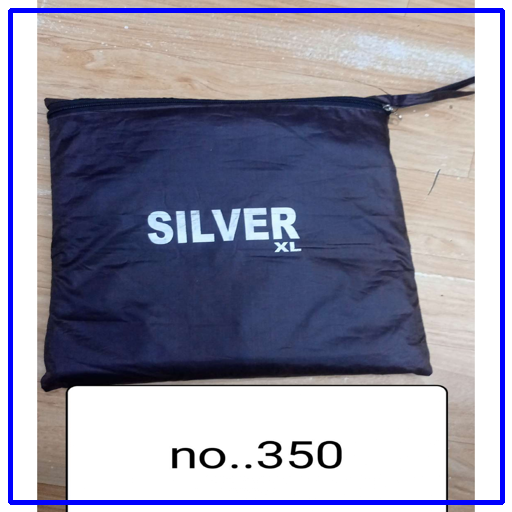

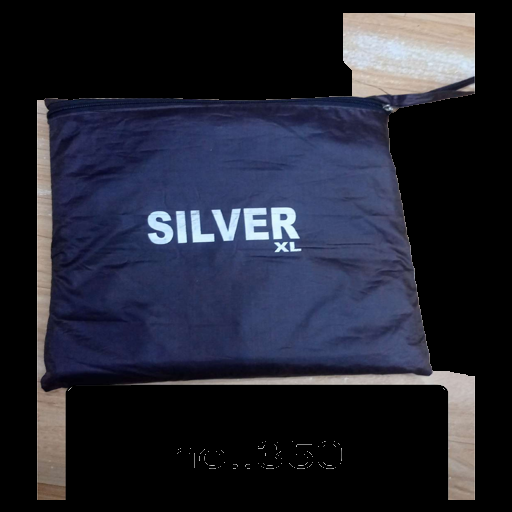

[[[185.89999999999998, 439.2], [329.1, 439.2], [329.1, 472.8], [185.89999999999998, 472.8]]]
150.09999999999997 430.79999999999995 364.90000000000003 481.20000000000005


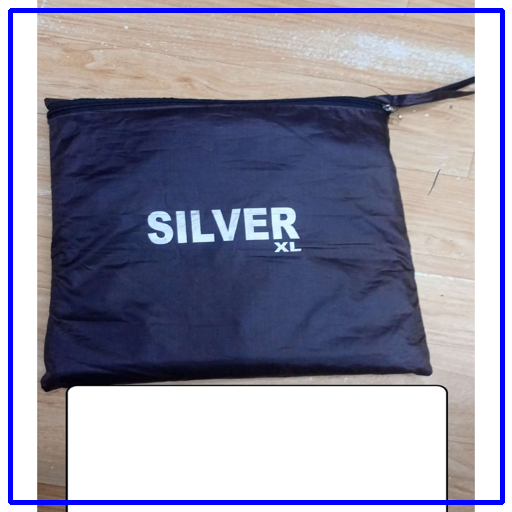

  0%|          | 0/50 [00:00<?, ?it/s]

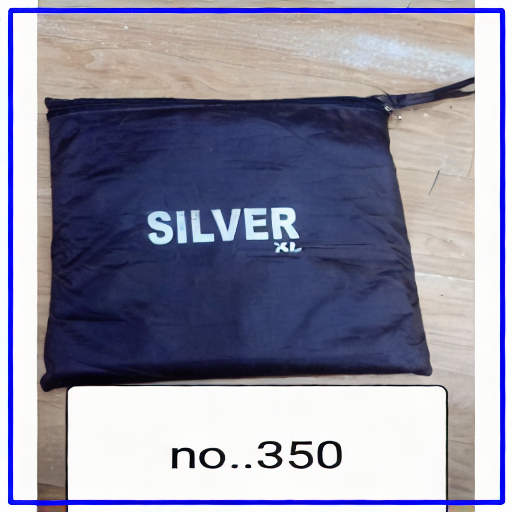

-------------------

Updated


NameError: ignored

In [ ]:
img_path='ab.jpg'
img = cv2.imread(img_path)
img = Image.fromarray(img).resize((512,512))
img = np.array(img.getdata()).reshape(img.size[0], img.size[1], 3)
img = img.astype("uint8")
print(type(img) , img.shape)
results = reader.readtext(img, detail=1, paragraph=False)
if len(results) > 0:
  print(results)
  # cv2_imshow(img)
  print("IMAGE " )
  print("preprocess")

  # print(img.shape , rect)
  # img = cv2.rectangle(img , (rect[0] , rect[1]) , (rect[3] , rect[2]) , (0,0,255) , 3)
  # cv2_imshow(img)

  preproc_img = preProcess(img, img_path , results)
  cv2_imshow(preproc_img)
  print("-------------------")
  print()
  # break
# cv2.waitKey(0)
# cv2.destroyAllWindows()
if len(results)!=0:
  print(f'Updated')
  # print(f'{number} Remaining')
else:
  print('Not Updated')
  # print(f'{number} Remaining')



  # number -= 1

In [ ]:
# for ind,img_name in enumerate(dir_list[12:60]):
#   img_path=f'{path}/{img_name}'
#   img = cv2.imread(img_path)
#   img = Image.fromarray(img).resize((512,512))
#   img = np.array(img.getdata()).reshape(img.size[0], img.size[1], 3)
#   img = img.astype("uint8")
#   print(type(img) , img.shape)
#   results = reader.readtext(img, detail=1, paragraph=False)
#   if len(results) > 0:
#     print(results)
#     # cv2_imshow(img)
#     print("IMAGE " , ind)
#     print("preprocess")

#     # print(img.shape , rect)
#     # img = cv2.rectangle(img , (rect[0] , rect[1]) , (rect[3] , rect[2]) , (0,0,255) , 3)
#     # cv2_imshow(img)

#     preproc_img = preProcess(img, img_path , results)
#     cv2_imshow(preproc_img)
#     print("-------------------")
#     print()
#     # break
#   # cv2.waitKey(0)
#   # cv2.destroyAllWindows()
#   if len(results)!=0:
#     print(f'Updated - {img_name}')
#     print(f'{number} Remaining')
#   else:
#     print('Not Updated')
#     print(f'{number} Remaining')



#   number -= 1